<a href="https://colab.research.google.com/github/kwanda2426/classification-predict-streamlit-template/blob/master/Team%2010%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://explore-datascience.net/images/images_admissions2/main-logo.jpg">

<img src="https://d2dfxqxblmblx4.cloudfront.net/wp-content/uploads/2013/01/18151729/twitter-logo.png">

<a id="top"></a>
#  **Team 10 Classification Predict** 
## Members: **Kwanda Mazibuko, Casper Kruger, Gudani Mbedzi, Lucy Lushaba** <sup> </sup>

## Table of contents
1. [Introduction](#intro)
2. [Data Collection](#data)
3. [Data Preprocessing](#cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Feature Engineering](#features)
6. [Feature Selection And Model Building](#model)
7. [Model Parameter Tuning](#tuning)
8. [Performance Evaluation](#evaluation)
9. [Conclusion](#conclusion)
10. [References](#references) 

<a id="intro"></a>
# 1. **Introduction**

The Glasgow Climate Pact, adopted by almost 200 countries has raised an alarm and concerns that human activities have caused a rise of around 1.1°C of global warming to date. The impact is already being felt around the globe. These developments have been shared with the world through various media outlets. In recent years social media in particular Twitter has risen to be the prefered source of information. This has created a massive source of unstructured of data. This type of data contains a variety of topics and can be analysed to find the sentiment behind it.

### **Problem Statement**

The developments around global warming and the increase use of social media has forced companies to design products and services around lessen the impact on the environment and the sentiments expressed by their target market on social media platform.
Therefore it is important that methods such as sentimental analysis are explored to provide companies with solutions that can provide insights for future marketing strategies thus increasing company profit margins.

### **Objectives**
The key objective is to create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

### **Literature Review**

**Global warming**

Glaciers are melting, sea levels are rising, cloud forests are dying, and wildlife is scrambling to keep pace. It has become clear that humans have caused most of the past century's warming by releasing heat-trapping gases as we power our modern lives. Called greenhouse gases, their levels are higher now than at any time in the last 800,000 years.

We often call the result global warming, but it is causing a set of changes to the Earth's climate, or long-term weather patterns, that varies from place to place. While many people think of global warming and climate change as synonyms, scientists use “climate change” when describing the complex shifts now affecting our planet’s weather and climate systems—in part because some areas actually get cooler in the short term.

Climate change encompasses not only rising average temperatures but also extreme weather events, shifting wildlife populations and habitats, rising seas, and a range of other impacts. All of those changes are emerging as humans continue to add heat-trapping greenhouse gases to the atmosphere, changing the rhythms of climate that all living things have come to rely on.

What will we do—what can we do—to slow this human-caused warming? How will we cope with the changes we've already set into motion? While we struggle to figure it all out, the fate of the Earth as we know it—coasts, forests, farms, and snow-capped mountains—hangs in the balance.

**Social media and public opinion**

About two-thirds of Americans (64%) say social media have a mostly negative effect on the way things are going in the country today, according to a Pew Research Center survey of U.S. adults conducted July 13-19, 2020. Just one-in-ten Americans say social media sites have a mostly positive effect on the way things are going, and one-quarter say these platforms have a neither positive nor negative effect.

Mass media and social media can also affirm latent attitudes and “activate” them, prompting people to take action. Just before an election, for example, voters who earlier had only a mild preference for one party or candidate may be inspired by media coverage not only to take the trouble to vote but perhaps also to contribute money or to help a party organization in some other way.

This means that people can be agitated to take any action with regards to whatever it is that they feel should be addressed, whether that means boycotting the products. In this case, offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

<a id="data"></a>
## 2. **Data Collection**


#### Class Description 

2 - News: the tweet links to factual news about climate change 

1 - Pro: the tweet supports the belief of man-made climate change

0 - Neutral: the tweet neither supports nor refutes the belief of man-made climate change 

-1 - Anti: the tweet does not believe in man-made climate change 

In [142]:
!pip install comet_ml

In [ ]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="cDBGt9YOCyyinNTUvxRUB3hxd",
    project_name="tweet-classifier",
    workspace="kwanda2426",
)

In [ ]:
!pip install unidecode
!pip install unicode
!pip install wordcloud
!pip install emoji

## **Import Libraries**

In [144]:
# Data manipulation
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
import unidecode
import unicodedata
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import word_tokenize, pos_tag, pos_tag_sents
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
# For searching patterns on the tweets (regex)
import re
# datetime
import datetime

# Libraries for data preparation and model building
from sklearn.utils import resample
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MaxAbsScaler
from scipy.stats import boxcox, zscore
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures

# visualizations
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# saving my model
import pickle

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thaba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thaba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\thaba\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thaba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Loading Data**

The basic process of loading data from a CSV file into a Pandas DataFrame (with all going well) is achieved using the “read_csv” function in Pandas.

In [145]:
#Read the data
df_train = pd.read_csv('https://raw.githubusercontent.com/kwanda2426/classification-predict-streamlit-template/master/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/kwanda2426/classification-predict-streamlit-template/master/test_with_no_labels.csv')
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


### Data Overview

**Train dataset**

In [146]:
# Checking how our training dataset looks like
print("Rows    : ", df_train.shape[0])

print("Columns : ", df_train.shape[1])

print("\nMissing values: ", df_train.isnull().sum().values.sum())

print("\nInformation about the data: ")
print("  \n", df_train.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in df_train.columns:
    unique_out = len(df_train[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  15819
Columns :  3

Missing values:  0

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB
  
 None

About the data: 

Feature 'sentiment' has 4 unique categories
Feature 'message' has 14229 unique categories
Feature 'tweetid' has 15819 unique categories


**Test dataset**

In [147]:
# Checking how our data looks like
print("Rows    : ", df_test.shape[0])

print("Columns : ", df_test.shape[1])

print("\nMissing values: ", df_test.isnull().sum().values.sum())

print("\nInformation about the data: ")
print("  \n", df_test.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in df_test.columns:
    unique_out = len(df_test[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories") 

Rows    :  10546
Columns :  2

Missing values:  0

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB
  
 None

About the data: 

Feature 'message' has 9575 unique categories
Feature 'tweetid' has 10546 unique categories


<a id="cleaning"></a>
## 3. **Data Preprocessing**

Data preprocessing is a technique that involves taking in raw data and transforming it into a understable format. The technique includes data cleaning, intergration, transformation, reduction and discretization. The data preprocessing plan will include the following processes:

- **Extraction process**

- **Data cleaning**



### Extraction Process 

The extraction process is performed to gain an accurate and deep understanding into the data when performing data analysis and is performed prior to data cleaning to ensure that information is not lost.

The extraction process will include:
- Convert text to lowercase
- remove stop words
- Extract hashtags and store then in a seperate dataframe
- Extract mentions and create a mentions column
- Group mentions based on sentiment
- Extract urls and create a urls column
- Group urls based on sentiment

#### Convert text to lowercase

In [178]:
def lowercase(text):
    text = text.lower() # making text to be lowercase
    return text

df_train['message'] = df_train['message'].apply(lowercase)

df_test['message'] = df_test['message'].apply(lowercase)

#### Extracting hashtags

In [179]:
def hashtag_extract(tweet):  
    """Helper function to extract hashtags"""
    # creating a empty list for storage where we will keep our Hashtags later
    hashtags = []
    
    # Going through each tweet and looking for each hashtag and appending the Hashtags in our empty list hashtags
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    
    # finding the sum of the elements in the list hashtag
    hashtags = sum(hashtags, [])
    
    # creating a dictionary with tokens from the list hashtags into a dictionary, where the keys are the frequency and the values is the frequency
    frequency = nltk.FreqDist(hashtags)
    
    # creating a dataframe from the dictionary to keep track of the word and the frequency
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                           'count': list(frequency.values())})
    
    # method is used to get n largest values from a dataframe 
    hashtag_df = hashtag_df.nlargest(25, columns="count")

    return hashtag_df


#Extracting the hashtags for the pro sentiment tweets 
pro = hashtag_extract(df_train['message'][df_train['sentiment'] == 1])

#Extracting the hashtags for the Anti sentiment tweets
anti = hashtag_extract(df_train['message'][df_train['sentiment'] == -1])

#Extracting the hashtags for the Neutral sentiment tweets
neutral = hashtag_extract(df_train['message'][df_train['sentiment'] == 0])

#Extracting the hashtags for the News sentiment tweets
news = hashtag_extract(df_train['message'][df_train['sentiment'] == 2])


#creating a dataframe with all the hashtags and a count for each sentiment
df_hashtags = pro.merge(anti,on='hashtag',suffixes=('_pro', '_anti'), how = 'outer').merge(neutral,on='hashtag', how = 'outer').merge(news,on='hashtag', suffixes = ('_neutral', '_news'), how = 'outer')
df_hashtags

,hashtag,count_pro,count_anti,count_neutral,count_news
0,climate,188.0,10.0,19.0,135.0
1,beforetheflood,148.0,NaN,5.0,4.0
2,climatechange,120.0,8.0,15.0,65.0
3,imvotingbecause,62.0,NaN,NaN,NaN
4,cop22,59.0,NaN,4.0,14.0
...,...,...,...,...,...
62,breaking,NaN,NaN,NaN,6.0
63,weather,NaN,NaN,NaN,5.0
64,forecast,NaN,NaN,NaN,5.0
65,breakingnews,NaN,NaN,NaN,5.0


#### Extracting Mentions

In [180]:
# Separate joined words based on capitals
def camel_case_split(identifier):
    
    matches = re.finditer(
        r'.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)',
        identifier
    )
    return "  ".join([m.group(0) for m in matches])

# Extract Mentions
def mentions_extractor(tweet):
    
    """function to extract mentions from the tweets"""
    mentions = re.findall(r'@([a-zA-Z0-9_]{1}[a-zA-Z0-9_]{0,14})', tweet)
  
    return mentions

#Applying the function on the dataframe
df_train['mentions'] = df_train['message'].apply(mentions_extractor)
df_train

,sentiment,message,tweetid,mentions,urls,clean_message,POS,lemmatized,num_words,word_cloud,word
0,1,polyscimajor epa chief doesn't think carbon di...,625221,[mashable],[https://t.co/yelvcefxkc],polyscimajor epa chief nt think carbon dioxide...,"[(polyscimajor, a), (epa, n), (chief, n), (nt,...",polyscimajor epa chief nt think carbon dioxide...,18,polyscimajor epa chief nt think carbon dioxide...,polyscimajor epa chief nt think carbon dioxide...
1,1,it's not like we lack evidence of anthropogeni...,126103,[],[],s like lack evidence anthropogenic global warming,"[(s, n), (like, n), (lack, n), (evidence, n), ...",s like lack evidence anthropogenic global warming,7,like lack evidence anthropogenic,like lack evidence anthropogenic
2,2,rt @rawstory: researchers say we have three ye...,698562,[rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt]",@ rawstory researchers say three years act cl...,"[(@, a), (rawstory, n), (researchers, n), (say...",@ rawstory researcher say three year act clima...,17,@ rawstory researcher say three year act ’ lat...,rawstory researcher say three year act late ...
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,[],[https://t.co/44wotxtlcd],odayinmaker wired pivotal year war climate cha...,"[(odayinmaker, n), (wired, v), (pivotal, a), (...",odayinmaker wire pivotal year war climate chan...,10,odayinmaker wire pivotal year war http tco wot...,odayinmaker wire pivotal year war http tco wot...
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,[soynoviodetodas],[],@ soynoviodetodas s racist sexist climate cha...,"[(@, a), (soynoviodetodas, n), (s, v), (racist...",@ soynoviodetodas s racist sexist climate chan...,12,@ soynoviodetodas racist sexist deny bigot lea...,soynoviodetodas racist sexist deny bigot lead...
...,...,...,...,...,...,...,...,...,...,...,...
15814,1,rt @ezlusztig: they took down the material on ...,22001,[ezlusztig],[],@ ezlusztig took material global warming lgbt...,"[(@, a), (ezlusztig, n), (took, v), (material,...",@ ezlusztig take material global warming lgbt ...,17,@ ezlusztig take material lgbt right health ca...,ezlusztig take material lgbt right health car...
15815,2,rt @washingtonpost: how climate change could b...,17856,[washingtonpost],[https://t.co/rpfgvb2plq],@ washingtonpost climate change could breakin...,"[(@, n), (washingtonpost, n), (climate, n), (c...",@ washingtonpost climate change could break mi...,13,@ washingtonpost could break million year old ...,washingtonpost could break million year old r...
15816,0,notiven: rt: nytimesworld :what does trump act...,384248,[],[https://t.co/0mp2],notiven rt nytimesworld trump actually believe...,"[(notiven, r), (rt, a), (nytimesworld, a), (tr...",notiven rt nytimesworld trump actually believe...,16,notiven nytimesworld actually believe rick per...,notiven nytimesworld actually believe rick per...
15817,-1,rt @sara8smiles: hey liberals the climate chan...,819732,[sara8smiles],[],@ sarasmiles hey liberals climate change crap...,"[(@, a), (sarasmiles, n), (hey, v), (liberals,...",@ sarasmiles hey liberal climate change crap h...,13,@ sarasmiles hey liberal crap hoax tie agenda ...,sarasmiles hey liberal crap hoax tie agenda b...


#### Group mentions based on sentiment

In [181]:
# Create a list of all the mentions
mentions_list = [item for new_list in df_train['mentions'] for item in new_list]

# Grouping mentions by sentiment

# News Mentions
news_mentions = df_train[df_train['sentiment'] == 2]['mentions']
#empty mentions for news sentiment
news_mentions_empty = [item for item in news_mentions if item == []]
# Actual mentions for news
news_mentions = [x for x in news_mentions if x != []]
news_mentions = [item for new_list in news_mentions for item in new_list]


# Positive Mentions
pos_mentions = df_train[df_train['sentiment'] == 1]['mentions']
# Empty mentions for positive sentiment
pos_mentions_empty = [item for item in pos_mentions if item == []]
# Actual mentions for positive mentions
pos_mentions = [x for x in pos_mentions if x != []]
pos_mentions = [item for new_list in pos_mentions for item in new_list]


# Neutral Mentions
neutral_mentions = df_train[df_train['sentiment'] == 0]['mentions']
# Empty mentions for neutral sentiment
neutral_mentions_empty = [item for item in neutral_mentions if item == []]
# Actual mentions for neutral mentions
neutral_mentions = [x for x in neutral_mentions if x != []]
neutral_mentions = [item for new_list in neutral_mentions for item in new_list]


# Negative Mentions
neg_mentions = df_train[df_train['sentiment'] == -1]['mentions']
# empty mentions for Negative sentiment
neg_mentions_empty = [item for item in neg_mentions if item == []]
# actual mentions for negative mentions
neg_mentions = [x for x in neg_mentions if x != []]
neg_mentions = [item for new_list in neg_mentions for item in new_list]


#### Extracting urls

In [182]:
# Extract Mentions
def urls_extractor(tweet):
    
    """function to extract urls from the tweets"""
    urls = re.findall(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', tweet)
  
    return urls

#Applying the function on the dataframe
df_train['urls'] = df_train['message'].apply(urls_extractor)
df_train

,sentiment,message,tweetid,mentions,urls,clean_message,POS,lemmatized,num_words,word_cloud,word
0,1,polyscimajor epa chief doesn't think carbon di...,625221,[mashable],[https://t.co/yelvcefxkc],polyscimajor epa chief nt think carbon dioxide...,"[(polyscimajor, a), (epa, n), (chief, n), (nt,...",polyscimajor epa chief nt think carbon dioxide...,18,polyscimajor epa chief nt think carbon dioxide...,polyscimajor epa chief nt think carbon dioxide...
1,1,it's not like we lack evidence of anthropogeni...,126103,[],[],s like lack evidence anthropogenic global warming,"[(s, n), (like, n), (lack, n), (evidence, n), ...",s like lack evidence anthropogenic global warming,7,like lack evidence anthropogenic,like lack evidence anthropogenic
2,2,rt @rawstory: researchers say we have three ye...,698562,[rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt]",@ rawstory researchers say three years act cl...,"[(@, a), (rawstory, n), (researchers, n), (say...",@ rawstory researcher say three year act clima...,17,@ rawstory researcher say three year act ’ lat...,rawstory researcher say three year act late ...
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,[],[https://t.co/44wotxtlcd],odayinmaker wired pivotal year war climate cha...,"[(odayinmaker, n), (wired, v), (pivotal, a), (...",odayinmaker wire pivotal year war climate chan...,10,odayinmaker wire pivotal year war http tco wot...,odayinmaker wire pivotal year war http tco wot...
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,[soynoviodetodas],[],@ soynoviodetodas s racist sexist climate cha...,"[(@, a), (soynoviodetodas, n), (s, v), (racist...",@ soynoviodetodas s racist sexist climate chan...,12,@ soynoviodetodas racist sexist deny bigot lea...,soynoviodetodas racist sexist deny bigot lead...
...,...,...,...,...,...,...,...,...,...,...,...
15814,1,rt @ezlusztig: they took down the material on ...,22001,[ezlusztig],[],@ ezlusztig took material global warming lgbt...,"[(@, a), (ezlusztig, n), (took, v), (material,...",@ ezlusztig take material global warming lgbt ...,17,@ ezlusztig take material lgbt right health ca...,ezlusztig take material lgbt right health car...
15815,2,rt @washingtonpost: how climate change could b...,17856,[washingtonpost],[https://t.co/rpfgvb2plq],@ washingtonpost climate change could breakin...,"[(@, n), (washingtonpost, n), (climate, n), (c...",@ washingtonpost climate change could break mi...,13,@ washingtonpost could break million year old ...,washingtonpost could break million year old r...
15816,0,notiven: rt: nytimesworld :what does trump act...,384248,[],[https://t.co/0mp2],notiven rt nytimesworld trump actually believe...,"[(notiven, r), (rt, a), (nytimesworld, a), (tr...",notiven rt nytimesworld trump actually believe...,16,notiven nytimesworld actually believe rick per...,notiven nytimesworld actually believe rick per...
15817,-1,rt @sara8smiles: hey liberals the climate chan...,819732,[sara8smiles],[],@ sarasmiles hey liberals climate change crap...,"[(@, a), (sarasmiles, n), (hey, v), (liberals,...",@ sarasmiles hey liberal climate change crap h...,13,@ sarasmiles hey liberal crap hoax tie agenda ...,sarasmiles hey liberal crap hoax tie agenda b...


#### Group urls based on sentiment

In [183]:
# Create a list of all the urls
urls_list = [item for new_list in df_train['urls'] for item in new_list]

# Grouping urls by sentiment

# News urls
news_urls = df_train[df_train['sentiment'] == 2]['urls']
#empty urls for news sentiment
news_urls_empty = [item for item in news_urls if item == []]
# Actual urls for news
news_urls = [x for x in news_mentions if x != []]
news_urls = [item for new_list in news_mentions for item in new_list]



# Positive Urls
pos_urls = df_train[df_train['sentiment'] == 1]['urls']
# Empty urls for positive sentiment
pos_urls_empty = [item for item in pos_urls if item == []]
# Actual urls for positive sentiment
pos_urls = [x for x in pos_urls if x != []]
pos_urls = [item for new_list in pos_urls for item in new_list]


# Neutral Urls
neutral_urls = df_train[df_train['sentiment'] == 0]['urls']
# Empty urls for neutral sentiment
neutral_urls_empty = [item for item in neutral_urls if item == []]
# Actual urls for neutral sentiment
neutral_urls = [x for x in neutral_urls if x != []]
neutral_urls = [item for new_list in neutral_urls for item in new_list]


# Negative Urls
neg_urls = df_train[df_train['sentiment'] == -1]['urls']
# empty urls for Negative sentiment
neg_urls_empty = [item for item in neg_urls if item == []]
# actual urls for negative mentions
neg_urls = [x for x in neg_urls if x != []]
neg_urls = [item for new_list in neg_urls for item in new_list]


In [184]:
df_train

,sentiment,message,tweetid,mentions,urls,clean_message,POS,lemmatized,num_words,word_cloud,word
0,1,polyscimajor epa chief doesn't think carbon di...,625221,[mashable],[https://t.co/yelvcefxkc],polyscimajor epa chief nt think carbon dioxide...,"[(polyscimajor, a), (epa, n), (chief, n), (nt,...",polyscimajor epa chief nt think carbon dioxide...,18,polyscimajor epa chief nt think carbon dioxide...,polyscimajor epa chief nt think carbon dioxide...
1,1,it's not like we lack evidence of anthropogeni...,126103,[],[],s like lack evidence anthropogenic global warming,"[(s, n), (like, n), (lack, n), (evidence, n), ...",s like lack evidence anthropogenic global warming,7,like lack evidence anthropogenic,like lack evidence anthropogenic
2,2,rt @rawstory: researchers say we have three ye...,698562,[rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt]",@ rawstory researchers say three years act cl...,"[(@, a), (rawstory, n), (researchers, n), (say...",@ rawstory researcher say three year act clima...,17,@ rawstory researcher say three year act ’ lat...,rawstory researcher say three year act late ...
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,[],[https://t.co/44wotxtlcd],odayinmaker wired pivotal year war climate cha...,"[(odayinmaker, n), (wired, v), (pivotal, a), (...",odayinmaker wire pivotal year war climate chan...,10,odayinmaker wire pivotal year war http tco wot...,odayinmaker wire pivotal year war http tco wot...
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,[soynoviodetodas],[],@ soynoviodetodas s racist sexist climate cha...,"[(@, a), (soynoviodetodas, n), (s, v), (racist...",@ soynoviodetodas s racist sexist climate chan...,12,@ soynoviodetodas racist sexist deny bigot lea...,soynoviodetodas racist sexist deny bigot lead...
...,...,...,...,...,...,...,...,...,...,...,...
15814,1,rt @ezlusztig: they took down the material on ...,22001,[ezlusztig],[],@ ezlusztig took material global warming lgbt...,"[(@, a), (ezlusztig, n), (took, v), (material,...",@ ezlusztig take material global warming lgbt ...,17,@ ezlusztig take material lgbt right health ca...,ezlusztig take material lgbt right health car...
15815,2,rt @washingtonpost: how climate change could b...,17856,[washingtonpost],[https://t.co/rpfgvb2plq],@ washingtonpost climate change could breakin...,"[(@, n), (washingtonpost, n), (climate, n), (c...",@ washingtonpost climate change could break mi...,13,@ washingtonpost could break million year old ...,washingtonpost could break million year old r...
15816,0,notiven: rt: nytimesworld :what does trump act...,384248,[],[https://t.co/0mp2],notiven rt nytimesworld trump actually believe...,"[(notiven, r), (rt, a), (nytimesworld, a), (tr...",notiven rt nytimesworld trump actually believe...,16,notiven nytimesworld actually believe rick per...,notiven nytimesworld actually believe rick per...
15817,-1,rt @sara8smiles: hey liberals the climate chan...,819732,[sara8smiles],[],@ sarasmiles hey liberals climate change crap...,"[(@, a), (sarasmiles, n), (hey, v), (liberals,...",@ sarasmiles hey liberal climate change crap h...,13,@ sarasmiles hey liberal crap hoax tie agenda ...,sarasmiles hey liberal crap hoax tie agenda b...


### Data Cleaning 

Data cleaning is a process of improving the quality of the data by identifying corrupt or erroneous records from a data set and rectifying them.

The data cleaning process will include the following:
- Contractions
- Removal of the noise:
    - urls,
    - hashtags,
    - mentions,
    - punctuations
- Tokenization
- Lemmatization

#### Contractions

In [185]:
#Function used to lookup shortwords from the dictionary
def lookup_dict(text, dictionary):
    
    for word in text.split(): 
        
        if word.lower() in dictionary:
            
            if word.lower() in text.split():
                
                text = text.replace(word, dictionary[word.lower()]) 
    return text

In [186]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"it's": "it is",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

#Apply a lambda function to look up every word in the tweets and replace it with the full word

#apply this to a new column so that we can see the difference
df_train['clean_message'] = df_train['message'].apply(lambda x: lookup_dict(x,contractions))
df_test['clean_message'] = df_test['message'].apply(lambda x: lookup_dict(x,contractions))
df_train

,sentiment,message,tweetid,mentions,urls,clean_message,POS,lemmatized,num_words,word_cloud,word
0,1,polyscimajor epa chief doesn't think carbon di...,625221,[mashable],[https://t.co/yelvcefxkc],polyscimajor epa chief does not think carbon d...,"[(polyscimajor, a), (epa, n), (chief, n), (nt,...",polyscimajor epa chief nt think carbon dioxide...,18,polyscimajor epa chief nt think carbon dioxide...,polyscimajor epa chief nt think carbon dioxide...
1,1,it's not like we lack evidence of anthropogeni...,126103,[],[],it is not like we lack evidence of anthropogen...,"[(s, n), (like, n), (lack, n), (evidence, n), ...",s like lack evidence anthropogenic global warming,7,like lack evidence anthropogenic,like lack evidence anthropogenic
2,2,rt @rawstory: researchers say we have three ye...,698562,[rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt]",rt @rawstory: researchers say we have three ye...,"[(@, a), (rawstory, n), (researchers, n), (say...",@ rawstory researcher say three year act clima...,17,@ rawstory researcher say three year act ’ lat...,rawstory researcher say three year act late ...
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,[],[https://t.co/44wotxtlcd],#todayinmaker# wired : 2016 was a pivotal year...,"[(odayinmaker, n), (wired, v), (pivotal, a), (...",odayinmaker wire pivotal year war climate chan...,10,odayinmaker wire pivotal year war http tco wot...,odayinmaker wire pivotal year war http tco wot...
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,[soynoviodetodas],[],"rt @soynoviodetodas: it is 2016, and a racist,...","[(@, a), (soynoviodetodas, n), (s, v), (racist...",@ soynoviodetodas s racist sexist climate chan...,12,@ soynoviodetodas racist sexist deny bigot lea...,soynoviodetodas racist sexist deny bigot lead...
...,...,...,...,...,...,...,...,...,...,...,...
15814,1,rt @ezlusztig: they took down the material on ...,22001,[ezlusztig],[],rt @ezlusztig: they took down the material on ...,"[(@, a), (ezlusztig, n), (took, v), (material,...",@ ezlusztig take material global warming lgbt ...,17,@ ezlusztig take material lgbt right health ca...,ezlusztig take material lgbt right health car...
15815,2,rt @washingtonpost: how climate change could b...,17856,[washingtonpost],[https://t.co/rpfgvb2plq],rt @washingtonpost: how climate change could b...,"[(@, n), (washingtonpost, n), (climate, n), (c...",@ washingtonpost climate change could break mi...,13,@ washingtonpost could break million year old ...,washingtonpost could break million year old r...
15816,0,notiven: rt: nytimesworld :what does trump act...,384248,[],[https://t.co/0mp2],notiven: rt: nytimesworld :what does trump act...,"[(notiven, r), (rt, a), (nytimesworld, a), (tr...",notiven rt nytimesworld trump actually believe...,16,notiven nytimesworld actually believe rick per...,notiven nytimesworld actually believe rick per...
15817,-1,rt @sara8smiles: hey liberals the climate chan...,819732,[sara8smiles],[],rt @sara8smiles: hey liberals the climate chan...,"[(@, a), (sarasmiles, n), (hey, v), (liberals,...",@ sarasmiles hey liberal climate change crap h...,13,@ sarasmiles hey liberal crap hoax tie agenda ...,sarasmiles hey liberal crap hoax tie agenda b...


In [187]:
#create a dictionary of contractions as the keys and its full word representation as the values
short_and_contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"it's": "it is",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have",
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great",
"8yo":"eight year old",
"brb" : "be right back",
"nvm": "never mind"
}

#Apply a lambda function to look up every word in the tweets and replace it with the full word

#apply this to a new column so that we can see the difference
df_train['clean_message'] = df_train['clean_message'].replace(short_and_contractions)
df_test['clean_message'] = df_test['clean_message'].replace(short_and_contractions)
df_train

,sentiment,message,tweetid,mentions,urls,clean_message,POS,lemmatized,num_words,word_cloud,word
0,1,polyscimajor epa chief doesn't think carbon di...,625221,[mashable],[https://t.co/yelvcefxkc],polyscimajor epa chief does not think carbon d...,"[(polyscimajor, a), (epa, n), (chief, n), (nt,...",polyscimajor epa chief nt think carbon dioxide...,18,polyscimajor epa chief nt think carbon dioxide...,polyscimajor epa chief nt think carbon dioxide...
1,1,it's not like we lack evidence of anthropogeni...,126103,[],[],it is not like we lack evidence of anthropogen...,"[(s, n), (like, n), (lack, n), (evidence, n), ...",s like lack evidence anthropogenic global warming,7,like lack evidence anthropogenic,like lack evidence anthropogenic
2,2,rt @rawstory: researchers say we have three ye...,698562,[rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt]",rt @rawstory: researchers say we have three ye...,"[(@, a), (rawstory, n), (researchers, n), (say...",@ rawstory researcher say three year act clima...,17,@ rawstory researcher say three year act ’ lat...,rawstory researcher say three year act late ...
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,[],[https://t.co/44wotxtlcd],#todayinmaker# wired : 2016 was a pivotal year...,"[(odayinmaker, n), (wired, v), (pivotal, a), (...",odayinmaker wire pivotal year war climate chan...,10,odayinmaker wire pivotal year war http tco wot...,odayinmaker wire pivotal year war http tco wot...
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,[soynoviodetodas],[],"rt @soynoviodetodas: it is 2016, and a racist,...","[(@, a), (soynoviodetodas, n), (s, v), (racist...",@ soynoviodetodas s racist sexist climate chan...,12,@ soynoviodetodas racist sexist deny bigot lea...,soynoviodetodas racist sexist deny bigot lead...
...,...,...,...,...,...,...,...,...,...,...,...
15814,1,rt @ezlusztig: they took down the material on ...,22001,[ezlusztig],[],rt @ezlusztig: they took down the material on ...,"[(@, a), (ezlusztig, n), (took, v), (material,...",@ ezlusztig take material global warming lgbt ...,17,@ ezlusztig take material lgbt right health ca...,ezlusztig take material lgbt right health car...
15815,2,rt @washingtonpost: how climate change could b...,17856,[washingtonpost],[https://t.co/rpfgvb2plq],rt @washingtonpost: how climate change could b...,"[(@, n), (washingtonpost, n), (climate, n), (c...",@ washingtonpost climate change could break mi...,13,@ washingtonpost could break million year old ...,washingtonpost could break million year old r...
15816,0,notiven: rt: nytimesworld :what does trump act...,384248,[],[https://t.co/0mp2],notiven: rt: nytimesworld :what does trump act...,"[(notiven, r), (rt, a), (nytimesworld, a), (tr...",notiven rt nytimesworld trump actually believe...,16,notiven nytimesworld actually believe rick per...,notiven nytimesworld actually believe rick per...
15817,-1,rt @sara8smiles: hey liberals the climate chan...,819732,[sara8smiles],[],rt @sara8smiles: hey liberals the climate chan...,"[(@, a), (sarasmiles, n), (hey, v), (liberals,...",@ sarasmiles hey liberal climate change crap h...,13,@ sarasmiles hey liberal crap hoax tie agenda ...,sarasmiles hey liberal crap hoax tie agenda b...


#### Removal of noise


Data that can not be processed/interpreted by a machine is classified as noisy data. Text data contains a lot of noise, this comes in a  form of special characters such as hashtags, punctuation and numbers. During this process the data will be changed from accent letters to normal letters and the noise will be removed.

In [188]:
# Changing accent letter to normals letters
def strip_accents(text):
    """This function is to strip accent letter those special characters then return a normal alphabet"""
    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

# applying the function on our training data
df_train['clean_message'] = df_train['message'].apply(strip_accents) 

# applying the function on our testing data
df_test['clean_message'] = df_test['message'].apply(strip_accents)

# remove stop words

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

# applying the function on our training data
df_train['clean_message'] = df_train['message'].apply(remove_stopwords) 

# applying the function on our testing data
df_test['clean_message'] = df_test['message'].apply(remove_stopwords)



# Cleaning the messages by removing urls, making messages to be lowercase,removing all punctuations and extra whitespaces 
def clean_text(text):
    """This function is to clean the data removing urls, punctuations, spaces and making text to be lowercase """
    
    URL = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    text = re.sub(URL, '', text)
    
    text = re.sub("it's", "it is", text) 
      
    text = re.sub("(\#)|(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})", "", text) # removing all punctuation with no space
    
    text = re.sub("(<br\s/><br\s/?)|(-)|(_)|(/)|(:).", " ", text) # removing all punctuation with a space
    
    text = re.sub(r'[0-9]', '', text) # removing numbers from strings
    
    text = re.sub("\\s+", " ", text)  # Remove extra whitespace
       
    text = re.sub(r"U+FFFD ", ' ', text) # Remove that funny diamond
    
    text = text.lstrip()  # removes whitespaces before string
    
    text = text.rstrip()  # removes whitespaces after string
    
    return text

df_train['clean_message'] = df_train['clean_message'].apply(clean_text)

df_test['clean_message'] = df_test['clean_message'].apply(clean_text)


#Removing RT ftom tweets
df_train['clean_message'] = df_train['clean_message'].str.strip('rt')

df_test['clean_message'] = df_test['clean_message'].str.strip('rt')


# Remove @ mentions
pattern = r"@[\w]+" # pattern to remove
sub = r'' # replace it with with an empty space 

#transforming our dataframe 
df_train['clean_message'] = df_train['clean_message'].replace(to_replace = pattern, value = sub, regex = True)

#transforming our dataframe 
df_test['clean_message'] = df_test['clean_message'].replace(to_replace = pattern, value = sub, regex = True) 

df_train

,sentiment,message,tweetid,mentions,urls,clean_message,POS,lemmatized,num_words,word_cloud,word
0,1,polyscimajor epa chief doesn't think carbon di...,625221,[mashable],[https://t.co/yelvcefxkc],polyscimajor epa chief nt think carbon dioxide...,"[(polyscimajor, a), (epa, n), (chief, n), (nt,...",polyscimajor epa chief nt think carbon dioxide...,18,polyscimajor epa chief nt think carbon dioxide...,polyscimajor epa chief nt think carbon dioxide...
1,1,it's not like we lack evidence of anthropogeni...,126103,[],[],s like lack evidence anthropogenic global warming,"[(s, n), (like, n), (lack, n), (evidence, n), ...",s like lack evidence anthropogenic global warming,7,like lack evidence anthropogenic,like lack evidence anthropogenic
2,2,rt @rawstory: researchers say we have three ye...,698562,[rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt]",@ rawstory researchers say three years act cl...,"[(@, a), (rawstory, n), (researchers, n), (say...",@ rawstory researcher say three year act clima...,17,@ rawstory researcher say three year act ’ lat...,rawstory researcher say three year act late ...
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,[],[https://t.co/44wotxtlcd],odayinmaker wired pivotal year war climate cha...,"[(odayinmaker, n), (wired, v), (pivotal, a), (...",odayinmaker wire pivotal year war climate chan...,10,odayinmaker wire pivotal year war http tco wot...,odayinmaker wire pivotal year war http tco wot...
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,[soynoviodetodas],[],@ soynoviodetodas s racist sexist climate cha...,"[(@, a), (soynoviodetodas, n), (s, v), (racist...",@ soynoviodetodas s racist sexist climate chan...,12,@ soynoviodetodas racist sexist deny bigot lea...,soynoviodetodas racist sexist deny bigot lead...
...,...,...,...,...,...,...,...,...,...,...,...
15814,1,rt @ezlusztig: they took down the material on ...,22001,[ezlusztig],[],@ ezlusztig took material global warming lgbt...,"[(@, a), (ezlusztig, n), (took, v), (material,...",@ ezlusztig take material global warming lgbt ...,17,@ ezlusztig take material lgbt right health ca...,ezlusztig take material lgbt right health car...
15815,2,rt @washingtonpost: how climate change could b...,17856,[washingtonpost],[https://t.co/rpfgvb2plq],@ washingtonpost climate change could breakin...,"[(@, n), (washingtonpost, n), (climate, n), (c...",@ washingtonpost climate change could break mi...,13,@ washingtonpost could break million year old ...,washingtonpost could break million year old r...
15816,0,notiven: rt: nytimesworld :what does trump act...,384248,[],[https://t.co/0mp2],notiven rt nytimesworld trump actually believe...,"[(notiven, r), (rt, a), (nytimesworld, a), (tr...",notiven rt nytimesworld trump actually believe...,16,notiven nytimesworld actually believe rick per...,notiven nytimesworld actually believe rick per...
15817,-1,rt @sara8smiles: hey liberals the climate chan...,819732,[sara8smiles],[],@ sarasmiles hey liberals climate change crap...,"[(@, a), (sarasmiles, n), (hey, v), (liberals,...",@ sarasmiles hey liberal climate change crap h...,13,@ sarasmiles hey liberal crap hoax tie agenda ...,sarasmiles hey liberal crap hoax tie agenda b...


In [189]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    removeEmoji = emoji_pattern.sub(r'', text)
    return removeEmoji

df_train["clean_message"] = df_train["clean_message"].apply(lambda x: remove_emoji(x))

df_test["clean_message"] = df_test["clean_message"].apply(lambda x: remove_emoji(x))

#### Tokenization

Tokenization is a process of breaking down unstructured data and natural language text into smaller units called tokens. During this process we will first tokenize the tweets and then transform the data using the TreebankWord.

In [190]:
#start by tokenizing the tweets
tokeniser = TreebankWordTokenizer()

# transforming the data using the Treebankword tokenizer
df_train['tokenized'] = df_train['clean_message'].apply(tokeniser.tokenize)

df_train

,sentiment,message,tweetid,mentions,urls,clean_message,POS,lemmatized,num_words,word_cloud,word,tokenized
0,1,polyscimajor epa chief doesn't think carbon di...,625221,[mashable],[https://t.co/yelvcefxkc],polyscimajor epa chief nt think carbon dioxide...,"[(polyscimajor, a), (epa, n), (chief, n), (nt,...",polyscimajor epa chief nt think carbon dioxide...,18,polyscimajor epa chief nt think carbon dioxide...,polyscimajor epa chief nt think carbon dioxide...,"[polyscimajor, epa, chief, nt, think, carbon, ..."
1,1,it's not like we lack evidence of anthropogeni...,126103,[],[],s like lack evidence anthropogenic global warming,"[(s, n), (like, n), (lack, n), (evidence, n), ...",s like lack evidence anthropogenic global warming,7,like lack evidence anthropogenic,like lack evidence anthropogenic,"[s, like, lack, evidence, anthropogenic, globa..."
2,2,rt @rawstory: researchers say we have three ye...,698562,[rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt]",@ rawstory researchers say three years act cl...,"[(@, a), (rawstory, n), (researchers, n), (say...",@ rawstory researcher say three year act clima...,17,@ rawstory researcher say three year act ’ lat...,rawstory researcher say three year act late ...,"[@, rawstory, researchers, say, three, years, ..."
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,[],[https://t.co/44wotxtlcd],odayinmaker wired pivotal year war climate cha...,"[(odayinmaker, n), (wired, v), (pivotal, a), (...",odayinmaker wire pivotal year war climate chan...,10,odayinmaker wire pivotal year war http tco wot...,odayinmaker wire pivotal year war http tco wot...,"[odayinmaker, wired, pivotal, year, war, clima..."
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,[soynoviodetodas],[],@ soynoviodetodas s racist sexist climate cha...,"[(@, a), (soynoviodetodas, n), (s, v), (racist...",@ soynoviodetodas s racist sexist climate chan...,12,@ soynoviodetodas racist sexist deny bigot lea...,soynoviodetodas racist sexist deny bigot lead...,"[@, soynoviodetodas, s, racist, sexist, climat..."
...,...,...,...,...,...,...,...,...,...,...,...,...
15814,1,rt @ezlusztig: they took down the material on ...,22001,[ezlusztig],[],@ ezlusztig took material global warming lgbt...,"[(@, a), (ezlusztig, n), (took, v), (material,...",@ ezlusztig take material global warming lgbt ...,17,@ ezlusztig take material lgbt right health ca...,ezlusztig take material lgbt right health car...,"[@, ezlusztig, took, material, global, warming..."
15815,2,rt @washingtonpost: how climate change could b...,17856,[washingtonpost],[https://t.co/rpfgvb2plq],@ washingtonpost climate change could breakin...,"[(@, n), (washingtonpost, n), (climate, n), (c...",@ washingtonpost climate change could break mi...,13,@ washingtonpost could break million year old ...,washingtonpost could break million year old r...,"[@, washingtonpost, climate, change, could, br..."
15816,0,notiven: rt: nytimesworld :what does trump act...,384248,[],[https://t.co/0mp2],notiven rt nytimesworld trump actually believe...,"[(notiven, r), (rt, a), (nytimesworld, a), (tr...",notiven rt nytimesworld trump actually believe...,16,notiven nytimesworld actually believe rick per...,notiven nytimesworld actually believe rick per...,"[notiven, rt, nytimesworld, trump, actually, b..."
15817,-1,rt @sara8smiles: hey liberals the climate chan...,819732,[sara8smiles],[],@ sarasmiles hey liberals climate change crap...,"[(@, a), (sarasmiles, n), (hey, v), (liberals,...",@ sarasmiles hey liberal climate change crap h...,13,@ sarasmiles hey liberal crap hoax tie agenda ...,sarasmiles hey liberal crap hoax tie agenda b...,"[@, sarasmiles, hey, liberals, climate, change..."


#### Lemmatization

Lemmatization is a process of converting/reducing a word to it meaningful root/base. During this process we will first change the column clean_message into a list.

In [191]:
# converting the column clean_message in the dataframe into a list
texts = df_train['clean_message'].tolist()

# tagging the tweets
tagged_texts = pos_tag_sents(map(word_tokenize, texts))

df_train['POS'] = tagged_texts

""" this function indentifies the parts of speech Noun, Adjective, Verb and Adverb """
def get_wordnet_pos(tag):
    
    if tag.startswith('J'):
        return wordnet.ADJ

    elif tag.startswith('V'):
        return wordnet.VERB

    elif tag.startswith('N'):
        return wordnet.NOUN

    elif tag.startswith('R'):
        return wordnet.ADV
    
    else:
        return wordnet.NOUN

# transforming the data with the function we created
df_train['POS'] = df_train['POS'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])



# Initialising our lemmatizer
lemmatizer = WordNetLemmatizer()

# applying lemmatization to the POS column
df_train['lemmatized'] = df_train['POS'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])

# joining the tokenised words after they have been lemmatized
df_train['lemmatized'] = [' '.join(map(str, l)) for l in df_train['lemmatized']]

df_train


,sentiment,message,tweetid,mentions,urls,clean_message,POS,lemmatized,num_words,word_cloud,word,tokenized
0,1,polyscimajor epa chief doesn't think carbon di...,625221,[mashable],[https://t.co/yelvcefxkc],polyscimajor epa chief nt think carbon dioxide...,"[(polyscimajor, a), (epa, n), (chief, n), (nt,...",polyscimajor epa chief nt think carbon dioxide...,18,polyscimajor epa chief nt think carbon dioxide...,polyscimajor epa chief nt think carbon dioxide...,"[polyscimajor, epa, chief, nt, think, carbon, ..."
1,1,it's not like we lack evidence of anthropogeni...,126103,[],[],s like lack evidence anthropogenic global warming,"[(s, n), (like, n), (lack, n), (evidence, n), ...",s like lack evidence anthropogenic global warming,7,like lack evidence anthropogenic,like lack evidence anthropogenic,"[s, like, lack, evidence, anthropogenic, globa..."
2,2,rt @rawstory: researchers say we have three ye...,698562,[rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt]",@ rawstory researchers say three years act cl...,"[(@, a), (rawstory, n), (researchers, n), (say...",@ rawstory researcher say three year act clima...,17,@ rawstory researcher say three year act ’ lat...,rawstory researcher say three year act late ...,"[@, rawstory, researchers, say, three, years, ..."
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,[],[https://t.co/44wotxtlcd],odayinmaker wired pivotal year war climate cha...,"[(odayinmaker, n), (wired, v), (pivotal, a), (...",odayinmaker wire pivotal year war climate chan...,10,odayinmaker wire pivotal year war http tco wot...,odayinmaker wire pivotal year war http tco wot...,"[odayinmaker, wired, pivotal, year, war, clima..."
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,[soynoviodetodas],[],@ soynoviodetodas s racist sexist climate cha...,"[(@, a), (soynoviodetodas, n), (s, v), (racist...",@ soynoviodetodas s racist sexist climate chan...,12,@ soynoviodetodas racist sexist deny bigot lea...,soynoviodetodas racist sexist deny bigot lead...,"[@, soynoviodetodas, s, racist, sexist, climat..."
...,...,...,...,...,...,...,...,...,...,...,...,...
15814,1,rt @ezlusztig: they took down the material on ...,22001,[ezlusztig],[],@ ezlusztig took material global warming lgbt...,"[(@, a), (ezlusztig, n), (took, v), (material,...",@ ezlusztig take material global warming lgbt ...,17,@ ezlusztig take material lgbt right health ca...,ezlusztig take material lgbt right health car...,"[@, ezlusztig, took, material, global, warming..."
15815,2,rt @washingtonpost: how climate change could b...,17856,[washingtonpost],[https://t.co/rpfgvb2plq],@ washingtonpost climate change could breakin...,"[(@, n), (washingtonpost, n), (climate, n), (c...",@ washingtonpost climate change could break mi...,13,@ washingtonpost could break million year old ...,washingtonpost could break million year old r...,"[@, washingtonpost, climate, change, could, br..."
15816,0,notiven: rt: nytimesworld :what does trump act...,384248,[],[https://t.co/0mp2],notiven rt nytimesworld trump actually believe...,"[(notiven, r), (rt, a), (nytimesworld, a), (tr...",notiven rt nytimesworld trump actually believe...,16,notiven nytimesworld actually believe rick per...,notiven nytimesworld actually believe rick per...,"[notiven, rt, nytimesworld, trump, actually, b..."
15817,-1,rt @sara8smiles: hey liberals the climate chan...,819732,[sara8smiles],[],@ sarasmiles hey liberals climate change crap...,"[(@, a), (sarasmiles, n), (hey, v), (liberals,...",@ sarasmiles hey liberal climate change crap h...,13,@ sarasmiles hey liberal crap hoax tie agenda ...,sarasmiles hey liberal crap hoax tie agenda b...,"[@, sarasmiles, hey, liberals, climate, change..."


<a id="EDA"></a>
## 4. **Exploratory Data Analysis**

During the exploratory data analysis process we will be looking into gaining ana accurate and deep understanding of the dataset. We will achieve this by performing the following processes:

- Sentiment distribution
- Tweet length distribution
- Hashtag analysis
- Frequently words from each sentiment
- Other frequent words without common words
- Mentions analysis
- Representation of mentions on wordcloud

### Sentiment Distribution

We plot the sentiment data to analyse the class distribution.

In [192]:
# labels
lab =["Pro", "News", "Neutral", "Anti"]
# values
val = df_train.sentiment.value_counts().values.tolist()
# create pie chart
fig = px.pie(df_train, 
             values = val,
             names = lab,
             title = "Sentiment distribution in data",
             hole = .5
            )
# update traces
fig.update_traces(
            textposition = "inside",
            textinfo = "percent +label")
# update layout
fig.update_layout(
    title_font_size = 22,
    plot_bgcolor = "rgb(243,243,243)",
    paper_bgcolor= "rgb(243,243,243)")

The data is imbalanced, the pro-climate tweets are more than tweets from the other classes. Most people from this twitter data set are pro-climate change.

### Tweet length distribution

#### Length of characters in each tweet per sentiment boxplots

From the boxplots below we observed that tweets that fall under the news climate change class have the lowest length of characters per tweet, followed by the pro climate change class that has a cluster of outliers below the lower whisker. The neutral climate change class have the highest length of characters per tweet.

In [193]:
# Finding Number of Words per Tweet from the lemmatized words
df_train["num_words"] = df_train["lemmatized"].apply(lambda x: len(str(x).split()))


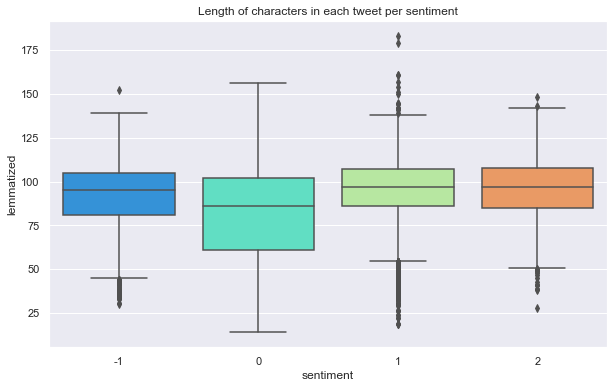

In [194]:
# Boxplot for the number of characters in each tweet
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# plotting boxplot for the length of how long each tweet is per sentiment 
sns.boxplot(x=df_train['sentiment'], y=df_train['lemmatized'].str.len(), data=df_train, palette=("rainbow"), ax=ax)

# title of the boxplot
plt.title('Length of characters in each tweet per sentiment')

# showing the plot
plt.show()

#### Number of words in each tweet for each sentiment boxplots

From the boxplots below we observed that tweets that fall under the news climate change class have the lowest number of words per tweet and the tweets are more compact compared to other classes. The neutral climate change class have generally the highest number of words per tweet.

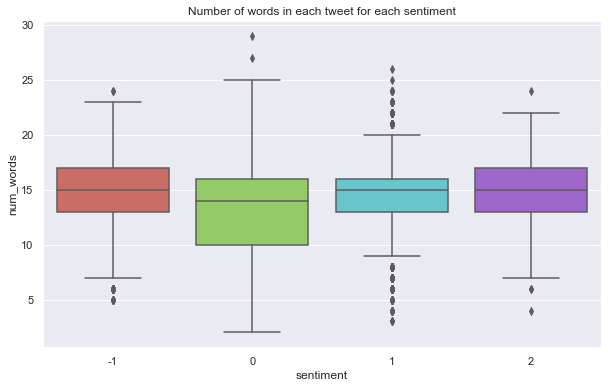

In [195]:
#Boxplot for number of words in each tweet
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# plotting boxplot for the length of how long each tweet is per sentiment 
sns.boxplot(x='sentiment', y='num_words', data=df_train, palette=("hls"))

# title of the boxplot
plt.title('Number of words in each tweet for each sentiment')

# showing the plot
plt.show()

### Hashtag analysis

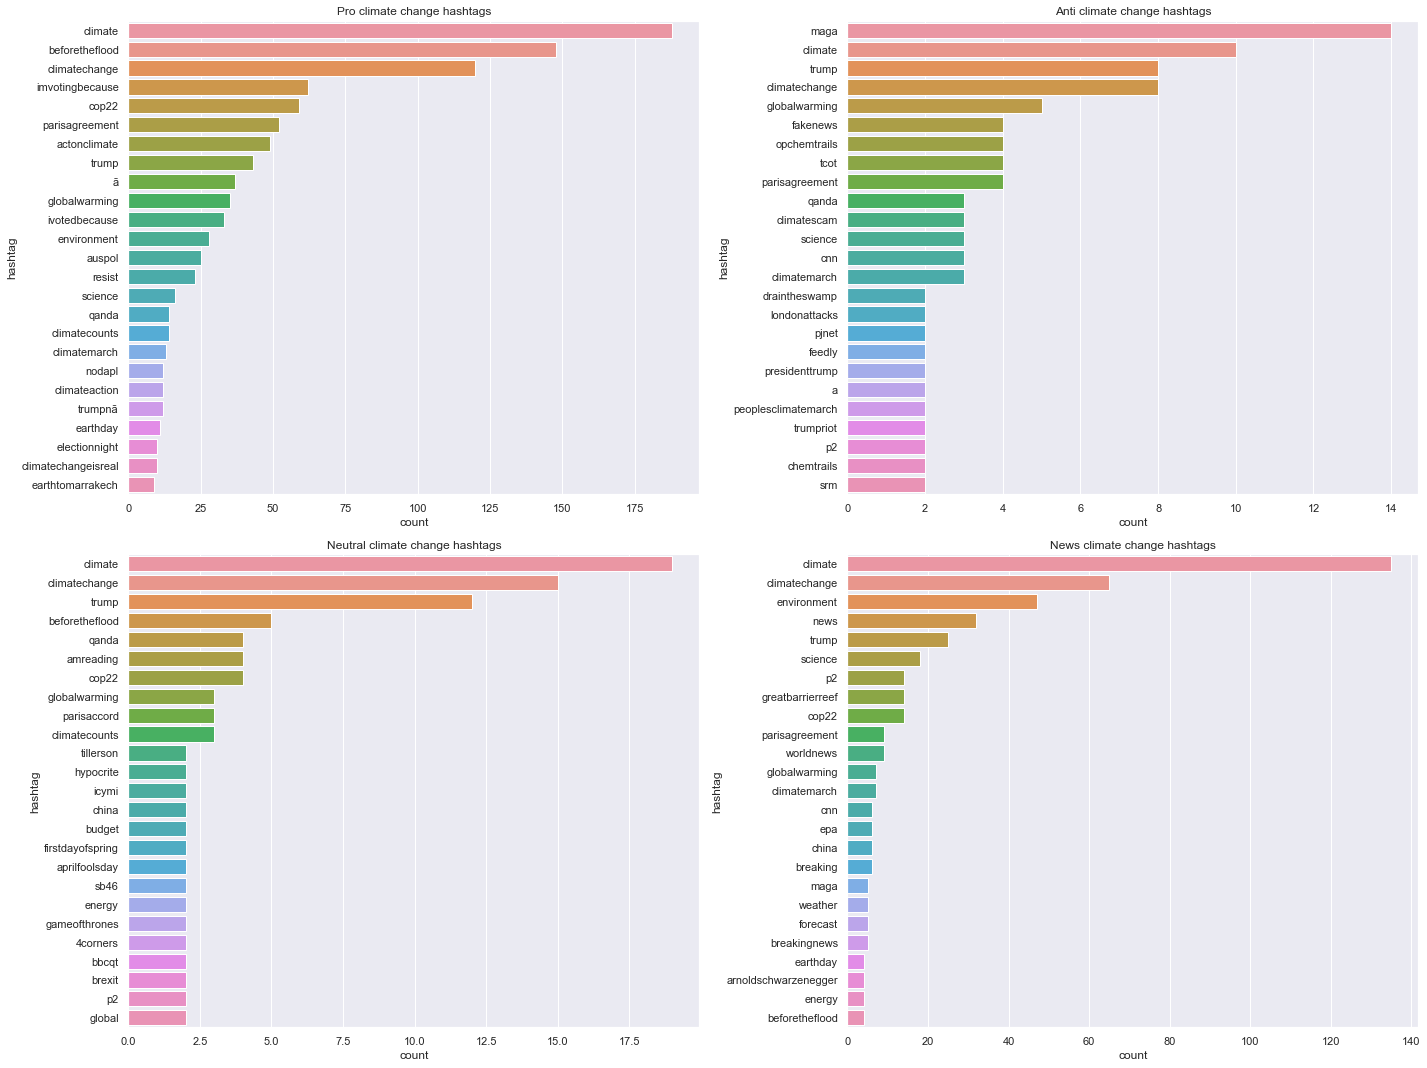

In [196]:
# hashtags which were previously extracted .hashtag.str.lower()
fig, axes = plt.subplots(ncols=2, 
                         nrows=2, 
                         figsize=(20, 15))

sns.barplot(data = pro,y = pro['hashtag'], x = pro['count'], ax = axes[0,0]).set(title = 'Pro climate change hashtags')

sns.barplot(data = anti,y = anti['hashtag'], x = anti['count'], ax = axes[0,1]).set(title = 'Anti climate change hashtags')

sns.barplot(data = neutral,y = neutral['hashtag'], x = neutral['count'], ax = axes[1,0]).set(title = 'Neutral climate change hashtags')

sns.barplot(data = news,y = news['hashtag'], x = news['count'], ax = axes[1,1]).set(title = 'News climate change hashtags')

plt.tight_layout()

#### Observations

- When observing the most used hashtags **climate**, **climate change** are in the top 3 across all classes, this was anticipated given that the dataset aggregates tweets pertaining to climate change.


- The hashtag **beforetheflood** sitting at number 2 on the pro climate change class makes reference to the 2016 documentary film about climate change. The film covers the devastating impacts of climate change, focuses extensively on climate change denial and how society can help preserve our environment. This is expected considering that the film shares the same sentiment as the pro climate change class. 
- The hashtag **COP22** at number 5 on the pro climate change class is an international meeting of political leaders and activists to discuss environmental issues held in Marrakech, Morocco and hashtag **parisaggrement** at number 6 is a legal binding treaty on climate change, that covers climate change mitigation, adaptation and finance. This may likely be due to the pro climate change change class support of the climate change conference.
 

- In 2018 Donald Trump stated that he does not believe in global warming, which may explain why the anti climate change class top hashtags are **MAGA** at number 1 and **Trump** at number 3. **MAGA** is an American political campaign slogan used by Donald Trump during his 2016 presidential campaign. The hashtag **fakenews** is term that was taken to mainstream by Donald Trump and it comes at number 6 on the anti climate change class whilst **climatescam** comes at number 11 on the list. This may have been the effect of Donald Trump sentiment that he shares with his followers about climate change.


- The neutral climate change class has hashtags that covers a variety of topics. Some are related to climate change such as **COP22**, **global warming**, **parisaccord** and some are not related such as **gameofthrones**, **budget**, **hypocrite**.


- When observing the top 3 hashtags on the news climate change class, they are all related to climate change. This might be an indicator that the news outlets have been reporting on climate change developments,
- The hashtag **environment** at number 3 of the news climate change class maybe an indications of how news outlets are bringing awareness to the changes in the environment due to climate change.
- The hashtag at **trump** at number 5 might be an indication of the news outlets reporting on Donald Trump denial of climate change.

### Frequent words from each sentiment

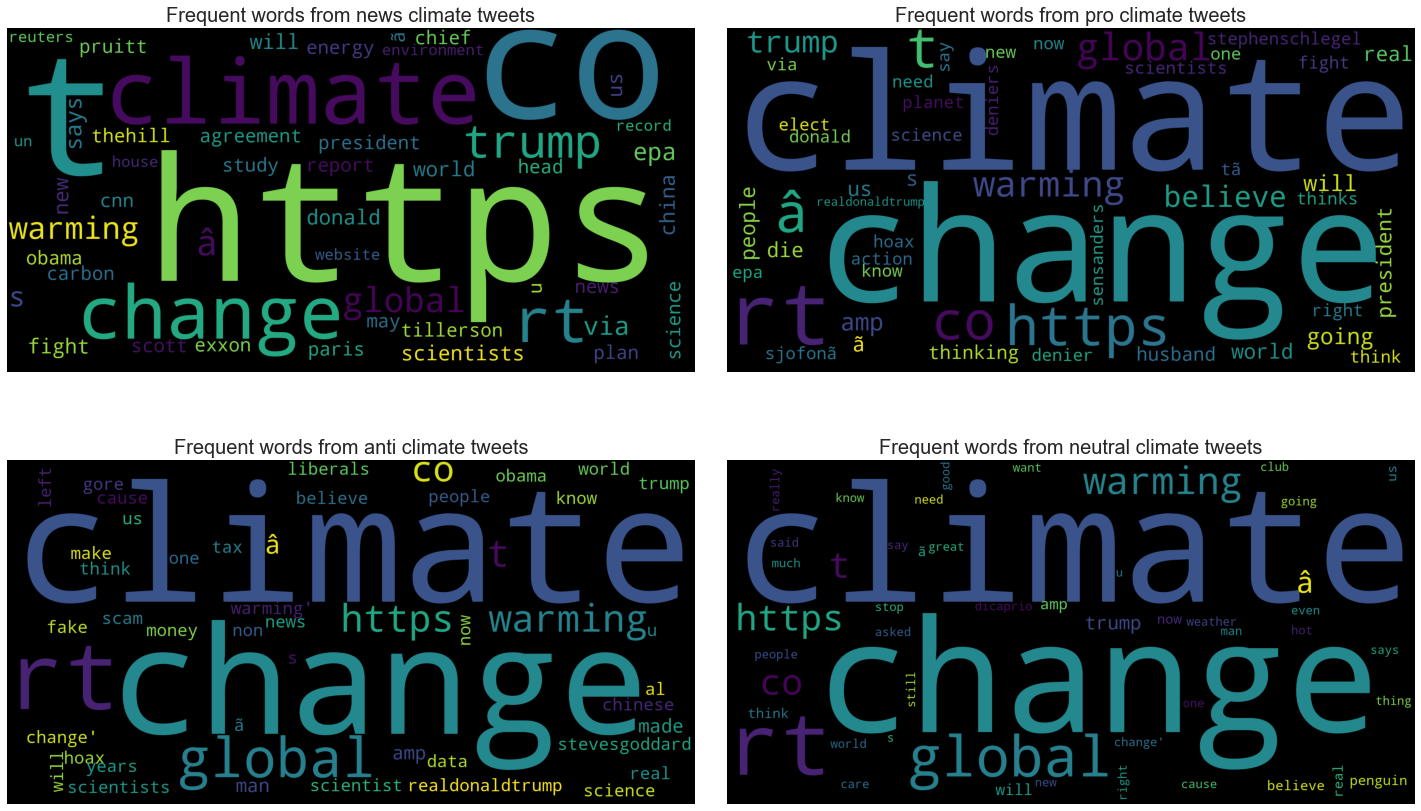

In [197]:
# Plotting word clouds
news = df_train[df_train['sentiment'] == 2]['message']
pro = df_train[df_train['sentiment'] == 1]['message']
neutral =df_train[df_train['sentiment'] == 0]['message']
anti = df_train[df_train['sentiment'] == -1]['message']


news = [word for line in news for word in line.split()]
pro = [word for line in pro for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
anti= [word for line in anti for word in line.split()]

# anti climate change word cloud
anti = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(anti))

# climate change neutral word cloud


neutral = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral))

# pro climate change word cloud


pro = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(pro))

# climate change news word cloud

news = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(news))


fig, axs = plt.subplots(2, 2, figsize = (20, 12))
fig.tight_layout(pad = 0)

axs[1, 0].imshow(anti)
axs[1, 0].set_title('Frequent words from anti climate tweets', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(neutral)
axs[1, 1].set_title('Frequent words from neutral climate tweets', fontsize = 20)
axs[1, 1].axis('off')

axs[0, 1].imshow(pro)
axs[0, 1].set_title('Frequent words from pro climate tweets', fontsize = 20)
axs[0, 1].axis('off')

axs[0, 0].imshow(news)
axs[0, 0].set_title('Frequent words from news climate tweets', fontsize = 20)
axs[0, 0].axis('off')


plt.savefig('joint_cloud.png')

#### Observations

- The most frequent words across all 4 classes are **climatechange** and **rt**. The word **rt(retweet)** indicates that there is a massive amount of information that resonate with the users and it is shared with a broader audience.
- The word **trump** is also present in all 4 classes, this was anticapated considering his sentiment and overall presence on social media.

- The news climate change class has the **http**, it represents the urls addresses that the news outlets share to direct users to articles.

- The pro climate change class has words **deniers, think, believe**. The word **deniers** might be refering to the people whom they believe to be indenial of climate change and **think, believe** might be refering to words they use to convince non-believers about climate change.

- The anti climate change class has words **hoax, scam, fake** which might indicate that they believe that climate change/global warming is a hoax.

### Other frequent words without common words

Text(0.5, 1.0, 'WORD FREQUENCY')

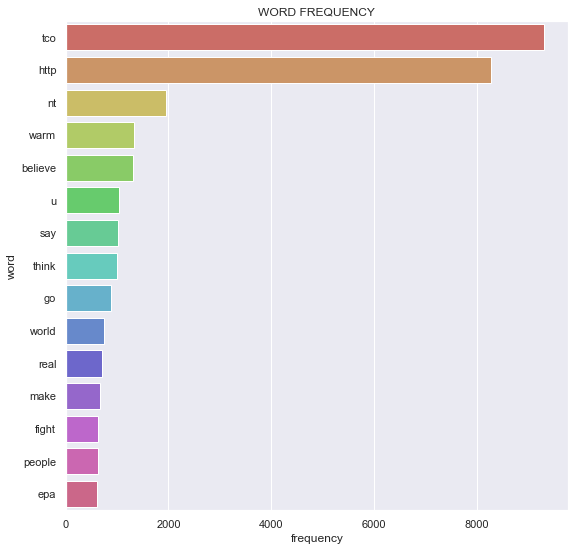

In [198]:
# Removing words that has no relevance to the context (https, RT, CO)
df_train['word_cloud'] = df_train['lemmatized'].str.replace('http\S+|www.\S+', '', case=False)

# Removing common words which appear in all sentiments
remove_words = ['climate', 'change', 'rt', 'global', 'warming', 'donald', 'trump','amp', 'realDonaldTrump', 's','aaa', 'a']

# Function to remove common words listed above
def remove_common_words(message):
    pattern = re.compile(r'\b(' + r'|'.join(remove_words) + r')\b\s*')
    message = pattern.sub('', message)
    return message

df_train['word_cloud'] = df_train['word_cloud'].apply(remove_common_words)


# Adding select words to stop words for better analysis on important word frequency
stop = set(stopwords.words('english')) 
stop_words = ["via", "co", "I",'We','The'] + list(stop)

# Removing stop words from the tweets
df_train['word'] = df_train['word_cloud'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
df_train['word'] = df_train['word'].str.replace(r'[^\w\s]+', '')

# Separating the strings to a list of words
word_list = [word for line in df_train['word'] for word in line.split()]

# Creating a word frequency counter
sns.set(style="darkgrid")
counts = Counter(word_list).most_common(15)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

# Creating a word frequency plot
fig, ax = plt.subplots(figsize = (9, 9))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df, palette="hls")
plt.title('WORD FREQUENCY')
#plt.savefig('wordcount_bar.png')


#### Observations
​
- The words **believe, warm, world** and **real** are words that will most likely be used by the pro climate chage class to express their beliefs and reality of climate change. There is also EPA (United States Environmental Protection Agency), whose mission is to protect humans and  environment health.This brings us to the conclusion that the top frequent words are more aligned with the the pro climate change class

### Mentions analysis

In [199]:
# Bargraph representation of the mention
mentions =['All', 'Postive', 'Neutral', 'Negative', 'News']

fig = go.Figure(data=[
    go.Bar(name='Total Mentions', x=mentions, y=[14799, 8497, 2198, 1386, 2718],marker_color='lightblue'),
    go.Bar(name='Unique Mentions', x=mentions, y=[7640, 4495, 1880, 919, 1302], marker_color ='purple')
])
# Change the bar mode
fig.update_layout(barmode='group', title = "Distribution of Mentions")

fig.show()


# Get count of total mentions and  total unique mentions
print("Total number of mentions: \t\t\t"+ str(len(mentions_list)))
print("Total number of unique mentions: \t\t"+ str(len(set(mentions_list))))

# Get count of mentions and unique mentions per sentiment
print("Total number of News mentions: \t\t\t"+ str(len(news_mentions)))
print("Total number of unique News mentions: \t\t"+ str(len(set(news_mentions))))

print("Total number of Positve mentions: \t\t"+ str(len(pos_mentions)))
print("Total number of unique Positive mentions: \t"+ str(len(set(pos_mentions))))

print("Total number of Neutral mentions: \t\t"+ str(len(neutral_mentions)))
print("Total number of unique Neutral mentions: \t"+ str(len(set(neutral_mentions))))

print("Total number of Negative mentions: \t\t"+ str(len(neg_mentions)))
print("Total number of unique Negative mentions: \t"+ str(len(set(neg_mentions))))

# Count of common mentions
common_mentions = set(pos_mentions) & set(news_mentions) & set(neg_mentions) & set(neutral_mentions)
print("Total number of Common mentions: \t\t"+ str(len(common_mentions)))

Total number of mentions: 			14799
Total number of unique mentions: 		7548
Total number of News mentions: 			2718
Total number of unique News mentions: 		1273
Total number of Positve mentions: 		8497
Total number of unique Positive mentions: 	4446
Total number of Neutral mentions: 		2198
Total number of unique Neutral mentions: 	1872
Total number of Negative mentions: 		1386
Total number of unique Negative mentions: 	914
Total number of Common mentions: 		40


###  Representations of mentions on a wordclouds

(-0.5, 7999.5, 3999.5, -0.5)

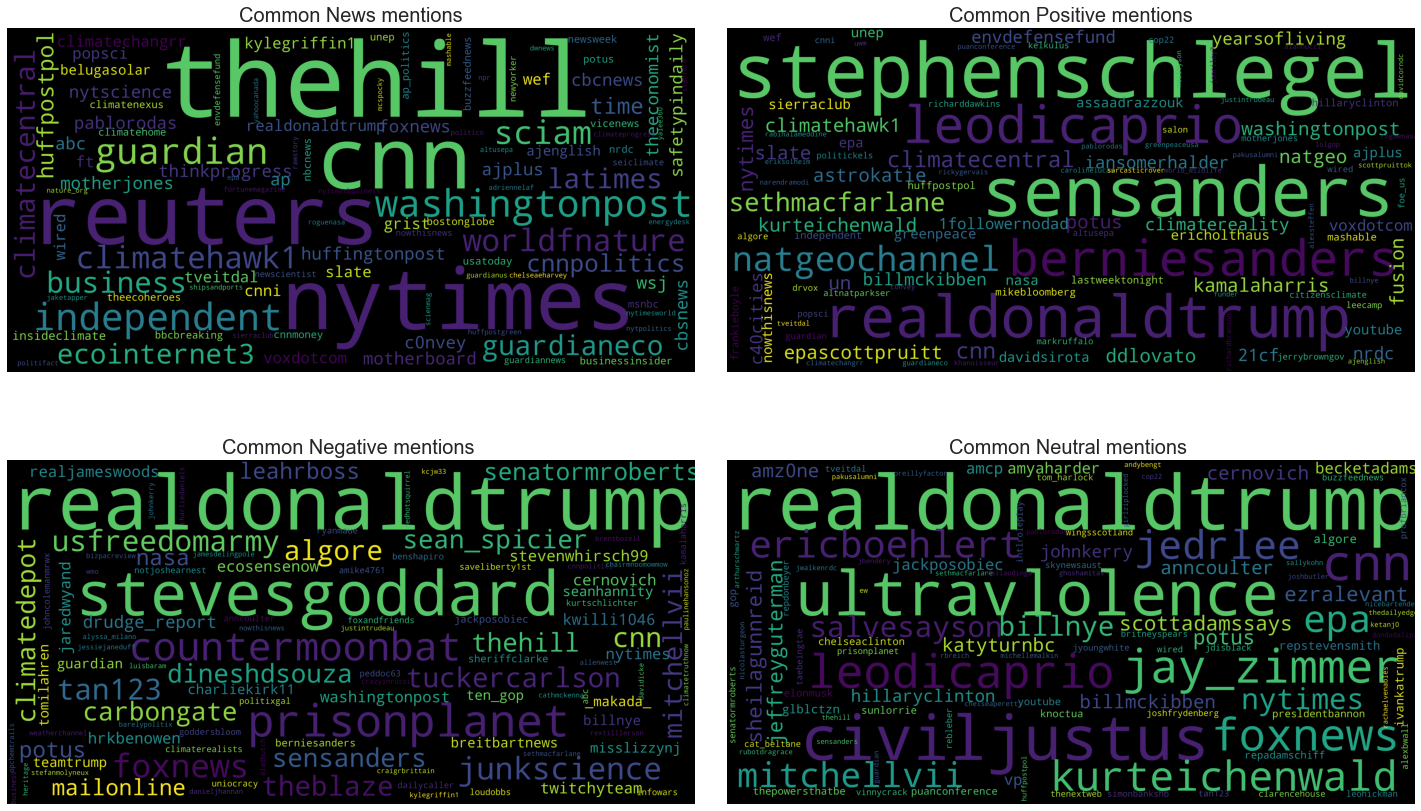

In [201]:
# Extracing rows per sentiment
df_all = df_train.copy()
news = df_all[df_all['sentiment'] == 2]['mentions']
pos = df_all[df_all['sentiment'] == 1]['mentions']
neutral = df_all[df_all['sentiment'] == 0]['mentions']
neg = df_all[df_all['sentiment'] == -1]['mentions']

# Splitting strings into lists
news = [word for line in news for word in line]
pos = [word for line in pos for word in line]
neutral = [word for line in neutral for word in line]
neg = [word for line in neg for word in line]

# Wordcloud for the News mentions 
news = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=60, 
    scale=20,
    random_state=42,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(news))

# Wordcloud for the Pro mentions
pos = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=60, 
    scale=20,
    random_state=42,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(pos))

# Wordcloud for the Neutral mentions
neutral = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=60, 
    scale=20,
    random_state=42,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral))

# Wordcloud for the Anti mentions
neg = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=60, 
    scale=20,
    random_state=42,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neg))

##Creating individual wordclouds for each sentiments title
fig, axs = plt.subplots(2, 2, figsize = (20, 12))
fig.tight_layout(pad = 0)

axs[0, 0].imshow(news)
axs[0, 0].set_title('Common News mentions', fontsize = 20)
axs[0, 0].axis('off')

axs[0, 1].imshow(pos)
axs[0, 1].set_title('Common Positive mentions', fontsize = 20)
axs[0, 1].axis('off')

axs[1, 0].imshow(neg)
axs[1, 0].set_title('Common Negative mentions ', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(neutral)
axs[1, 1].set_title('Common Neutral mentions ', fontsize = 20)
axs[1, 1].axis('off')

#plt.savefig('joint_cloud.png')

#### Observations


- The **realdonaldtrump** is one of the top mentions and it is common amongst all cliamte change classes.

- The **cnn, nytimes, washingtonpost, reuters, guardian, latimes, cbsnews, foxnews** mentions in the news climate change class refers to the news outlets.

- The **leodicaprio** and **natgeochannel** mentions refers to the documentary film **Before the Flood** produced by Leonardo DiCaprio and aired on the National Geographic channel.

- The **stevesgoddard** mention refers to Steven Goddard who is a cliamte change denier. The mention **junkscience** refers to an untested or unproven theories when presented as scientific fact, this might the what anti climate change class believe about cimate change.

Based on the tweets that were explore, 54% belonged to the pro climate change class, which brings us to the conclusion that majority of the user's belief that climate change is man-made. It was observed that most of the tweets contained the words **climate change & trump** across all classes. There is also an indication that there was a massive amount of information that resonated with users and was shared with a broader audience, this is based on the of **retweets** present across all classes.

The presence of the words **https, science, study** in the news climate chnage class suggests that the tweets were mostly about purely reporting about climate change.

The pro climate change class words like **believe, real, think, deniers** which may suggest that the pro class has a desire to change the minds of deniers.

The neutral climate change class has been the most interesting class to explore. The class has words such as **climate change, COP22, leornado** which are related to climate but the class also have words that are not related to climate change such as **game of thrones, hypocrite**. This is expected as this type of group is impartial.

The presence of words such as **fake, MAGA, climate scam** in the anti cliamte class suggests that this class might comprise oF Donald Trump followers/supporters.


<a id="features"></a>
## 5. **Feature Engineering**

**Data Balance**

One of the rules in machine learning is, its important to balance out the data set or at least get it close to balance it. The main reason for this is to give equal priority to each class in laymen terms.
Feeding imbalanced data to your classifier can make it biased in favor of the majority class, simply because it did not have enough data to learn about the minority. We saw that the pro-climate class is represented more than the others.

In this case we balance our data set.

In [207]:
def resample_data(df):
    
    # Determining the class with more tweets
    
    upper_class = int(len(df[df['sentiment'] == 1]))
    
    # seperating the four classes 
    class_anti = df[df['sentiment'] == -1] 

    class_neutral = df[df['sentiment'] == 0]

    class_pro = df[df['sentiment'] == 1]

    class_news = df[df['sentiment'] == 2]
    
    # upsampling classes
    class_1_up = resample(class_anti, replace = True,n_samples = upper_class, random_state = 0)

    class_2_up = resample(class_neutral,replace = True,n_samples = upper_class, random_state = 0)

    class_4_up = resample(class_news,replace = True,n_samples = upper_class, random_state = 0)

    class_3_down = resample(class_pro,replace = False,n_samples = upper_class, random_state = 0) # nothing was changed 
    
    # Creating a new DataFrame out of the balanced data
    new_df = pd.concat([class_1_up, class_2_up, class_4_up, class_3_down])

    return new_df

In [208]:
# balanced data set
df_train_ = df_train.copy()

new_df = resample_data(df_train_)

In [209]:
# sentiment count

new_df.sentiment.value_counts()

-1    8530
 0    8530
 2    8530
 1    8530
Name: sentiment, dtype: int64

The data is now balanced, all classes are evenly represented.


**Vectorization**

The data we have is text, but machine learning algorithms operate on a numeric feature space, expecting input as a two-dimensional array where rows are instances and columns are features. In order to perform machine learning on text, we need to transform our documents into vector representations such that we can apply numeric machine learning. We make use of two vectorization techniques:

- CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

In [ ]:
vect = CountVectorizer(stop_words = 'english',
                                              max_df = 0.8, min_df = 1,
                                          ngram_range = (1,2))

X_data = vect.fit_transform(df_train['clean_message']) # predictor variable

test_data = vect.fit_transform(df_test['clean_message']) # predictor variable

- Frequency–Inverse Document Frequency Vectorizer Transforms text to feature vectors that can be used as input to estimator. vocabulary_ Is a dictionary that converts each token (word) to feature index in the matrix, each unique token gets a feature index. 

In [ ]:
# initialise a vectorizer

vect = TfidfVectorizer(stop_words = 'english',max_df = 0.8, min_df = 1,
                                          ngram_range = (1,3))

X_data = vect.fit_transform(df_train['clean_message']) # predictor variable

test_data = vect.fit_transform(df_test['clean_message']) # predictor variable

The data become numeric which is useful for building a machine learning algorithm. 

**Data scaling**

MaxAbsScaler estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.

In [ ]:
# initialise a scaler

scaler = MaxAbsScaler() 

scaled_x = scaler.fit_transform(X_data) # scale x

scaled_data = scaler.fit_transform(test_data)

<a id="model"></a>
## 6. **Feature Selection And Model Building**

The process of training an ML model involves providing an ML algorithm (that is, the learning algorithm) with training data to learn from. The term ML model refers to the model artifact that is created by the training process.

The training data must contain the correct answer, which is known as a target or target attribute. The learning algorithm finds patterns in the training data that map the input data attributes to the target (the answer that you want to predict), and it outputs an ML model that captures these patterns.
We train different models on the training data.

In [210]:
# extract data for training and validation
df_new_train = df_train.copy()

X = df_train.clean_message.values # predictor variable


y = df_train.sentiment.values # target variable

Data is randomly split into training and validation data sets. 80% is for training the model and 20% is reserved for validation. 

- **The training** set is a subset of the dataset to build predictive models.

- **The validation** set is a subset of the dataset to assess the performance of the model built in the training phase. It provides a test platform for fine-tuning model’s parameters and selecting the best-performing model.

- **Test** set or unseen examples is a subset of the dataset to assess the likely future performance of a model. If a model fit to the training set much better than it fits the test set, overfitting is probably the cause.

**Split Data**

We always split your dataset into train/test folds before performing feature selection. This prevents what is known as data leakage, where some of the 'unseen' data is exposed to the model during the training process, which would in turn inflate its test set accuracy later on.

In [211]:
# split data for training and validation

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                   random_state = 42,
                                                   test_size = 0.20)

### **Feature Selection**

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

We aim to find the features that provide the highest peerformance.



In [212]:
vect = TfidfVectorizer(stop_words = 'english',max_df = 0.8, min_df = 1,
                                          ngram_range = (1,3))

X_train = vect.fit_transform(x_train)
X_test = vect.fit_transform(x_test)
test = vect.fit_transform(df_test['clean_message'])

NB:The following code takes time to run.

In [ ]:
lsvc = LinearSVC(C = 5, class_weight = 'balanced',
                                  max_iter = 8000)
                                
# We then build our forward feature selector

sf = sfs(lsvc, k_features = 25, forward = True, scoring = 'f1', cv = 10)
sf = sf.fit(X_train, y_train)

Plot results to see the number of features that give the optimal performance.

In [ ]:
# Plot the results
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.9, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

Having determined which number of features was best, we'll select those specific features and train the model using only them.

In [ ]:
# Extract the feature names for the optimal number using the dictionary provided by the subsets_ method
columns = list(sfs.subsets_[21]['feature_idx'])

X_train_sfs = X_train[:, columns]
X_test_sfs = X_test[:, columns]

### **Model Building**

**Logistic Regression**

Logistic regression works by measuring the relationship between the target variable (what we want to predict) and one or more predictor. It does this by estimating the probabilities with the help of its underlying logistic function.

Logistic regression is named after the function used at its heart, the logistic function. Statisticians initially used it to describe the properties of population growth. Sigmoid function and logit function are some variations of the logistic function. Logit function is the inverse of the standard logistic function.

It's represented by the equation:  $${y}=\frac{e^{b0 + b1*x}}{1 + e^{b0 + b1*x}}$$
where :
- ${y}$ = the output of the function
-  $b_0$  = the bias or intercept
-  $e$  = the base of the natural logarithms
- $b_1$ = the coefficient for the input
-$x$ = the predictor variable

In our case, the outcome variable can have three or more possible unordered types –  types having no quantitative significance.


In [ ]:
# LogisticRegression and countVectorizer

lr = Pipeline([('vect', CountVectorizer(stop_words = 'english',
                                              max_df = 0.8, min_df = 1,
                                          ngram_range = (1,2))),
                        ('scaler', preprocessing.MaxAbsScaler()),
                         ('lr', LogisticRegression()),])

# train model

lr.fit(x_train,y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.8, ngram_range=(1, 2),
                                 stop_words='english')),
                ('scaler', MaxAbsScaler()), ('lr', LogisticRegression())])

**Random Forest Classifier**

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


In [ ]:
# Random Forest Classifier and CountVectorizer

rfc = Pipeline([('vect', CountVectorizer(stop_words = 'english',
                                              max_df = 0.8, min_df = 1,
                                          ngram_range = (1,2))),
                    ('scaler', preprocessing.MaxAbsScaler()),
                         ('rfc', RandomForestClassifier()),])

# Train model

rfc.fit(x_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.8, ngram_range=(1, 2),
                                 stop_words='english')),
                ('scaler', MaxAbsScaler()), ('rfc', RandomForestClassifier())])

**Linear Support Vector Classifier**

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

According to the SVM algorithm we find the points closest to the line from both the classes.These points are called support vectors. Now, we compute the distance between the line and the support vectors. This distance is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is the optimal hyperplane.

In [213]:
# Linear Support Vector Classifier with TfidfVectorizer

lsvc = Pipeline([('tfidf', TfidfVectorizer(strip_accents = 'ascii',
                                        max_df = 0.8, min_df = 1,
                                          ngram_range = (1,3))),
                             ('scaler', preprocessing.MaxAbsScaler()),
                 ('lsvc', LinearSVC(C = 5, class_weight = 'balanced',
                                  max_iter = 8000))])

# Train model
lsvc.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, ngram_range=(1, 3),
                                 strip_accents='ascii')),
                ('scaler', MaxAbsScaler()),
                ('lsvc',
                 LinearSVC(C=5, class_weight='balanced', max_iter=8000))])

**eXtreme Gradient Boosting(XGB)Classifier**

Boosting is a strong alternative to bagging. Instead of aggregating predictions, boosters turn weak learners into strong learners by focusing on where the individual models (usually Decision Trees) went wrong. In Gradient Boosting, individual models train upon the residuals, the difference between the prediction and the actual results. Instead of aggregating trees, gradient boosted trees learns from errors during each boosting round.

XGBoost minimizes a regularized (L1 and L2) objective function that combines a convex loss function (based on the difference between the predicted and target outputs) and a penalty term for model complexity (in other words, the regression tree functions).

In [ ]:
# XGBClassifier and TfidfVectorizer

xgb = Pipeline([('tfidf', TfidfVectorizer(max_df = 0.8, min_df = 1,
                                            ngram_range = (1,3))), 
                 
                 ('scaler', preprocessing.MaxAbsScaler()),
                 
                 ('xgb', XGBClassifier())])

# Train model

xgb.fit(x_train, y_train)


[16:14:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.8, ngram_range=(1, 3))),
                ('scaler', MaxAbsScaler()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
 

<a id="tuning"></a>
## 7. **Model Performance Evaluation**

Evaluating a model is a very important step throughout the development of the model. It is important to note that we can evaluate models successfully. Especially, when working in a supervised learning environment as the actual values are available. These values help in order for the evaluation methods to function.

Model Evaluation is an integral part of the model development process. It helps to find the best model that represents our data. It also focuses on how well the chosen model will work in the future.

Evaluating model performance with the training data is not acceptable in data science. It can easily generate overoptimistically and overfit models. There are two methods of evaluating models in data science, Hold-Out and Cross-Validation. To avoid overfitting, both methods use a test set (not seen by the model) to evaluate model performance.

We use the f-score to evaluate model performance. The F1-score or F1-measure is a measure of a model's accuracy in test data set. It is calculated from the precision and recall of the test data, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive.

**Logistic Regression**

In [ ]:
print('f1- score: '+ str(metrics.f1_score(y_test, lr.predict(x_test), average = 'macro')))

print('\nConfusion Matrix\n')

print(confusion_matrix(y_test, lr.predict(x_test)))

f1- score: 0.9388499039103362

Confusion Matrix

[[1698    6    2    1]
 [   2 1681   35    4]
 [  22  143 1420  139]
 [   3   14   40 1614]]


**Random Forest Classifier**

In [ ]:
print('f1- score: '+ str(metrics.f1_score(y_test, rfc.predict(x_test), average = 'macro')))

print('\nConfusion Matrix\n')

print(confusion_matrix(y_test, rfc.predict(x_test)))

f1- score: 0.9008305541969246

Confusion Matrix

[[1696    8    0    3]
 [   1 1685   29    7]
 [  15  277 1167  265]
 [   0   13   31 1627]]


**Linear Support Vector Classification**

In [ ]:
print('f1- score:')

print(metrics.f1_score(y_test, lsvc.predict(x_test), average = 'macro'))

print('\nConfusion Matrix\n')

print(confusion_matrix(y_test, lsvc.predict(x_test)))

f1- score:
0.9312239173354285

Confusion Matrix

[[1697    6    1    3]
 [   7 1663   44    8]
 [  30   96 1368  230]
 [   2    5   28 1636]]


**XGBClassifier**

In [ ]:
print('f1- score:')

print(metrics.f1_score(y_test, xgb.predict(x_test), average = 'macro'))

print('\nConfusion Matrix\n')

print(confusion_matrix(y_test, xgb.predict(x_test)))

f1- score:
0.6863855080805081

Confusion Matrix

[[1450  139   74   44]
 [  65 1317  210  130]
 [ 192  762  579  191]
 [  34  113   99 1425]]


In [ ]:
# Dictionary of results
results_dict = {'Training f1-score':
                    {
                        "LogisticRegression": f1_score(y_train, lr.predict(x_train) , average = 'macro'),
                        "RandomForestClassifier": f1_score(y_train, rfc.predict(x_train), average = 'macro'),
                        "LinearSVC": f1_score(y_train, lsvc.predict(x_train) , average = 'macro'),
                        "XGBClassifier": f1_score(y_train, xgb.predict(x_train) , average = 'macro')
                    },
                    'Test f1-score':
                    {
                        "LogisticRegression": f1_score(y_test, lr.predict(x_test), average = 'macro'),
                        "RandomForestClassifier": f1_score(y_test, rfc.predict(x_test), average = 'macro'),
                        "LinearSVC": f1_score(y_test, lsvc.predict(x_test) , average ='macro'),
                        "XGBClassifier": f1_score(y_test, xgb.predict(x_test) , average = 'macro')
                        
                    }

                }

# Create dataframe from dictionary
results = pd.DataFrame(results_dict)

results.head() # shows results


,Training f1-score,Test f1-score
LogisticRegression,0.999523,0.938850
RandomForestClassifier,0.999780,0.900831
LinearSVC,0.999780,0.931224
XGBClassifier,0.857914,0.686386


<a id="evaluation"></a>
## 8. **Model Parameter Tuning**

Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process.

Hyperparameters control the over-fitting and under-fitting of the model. Optimal hyperparameters often differ for different datasets. To get the best hyperparameters the following steps are followed:

- For each proposed hyperparameter setting the model is evaluated.

- The hyperparameters that give the best model are selected.

Hyperparameters Search: Grid search picks out a grid of hyperparameter values and evaluates all of them. Guesswork is necessary to specify the min and max values for each hyperparameter. Hyperparameter tuning picks a few hyperparameter settings, evaluates the validation matrices, adjusts the hyperparameters, and re-evaluates the validation matrices.

In [ ]:
# GridSearch on a pipeline

params = {
            'C': [0.1, 0.5, 1.0, 5.0],'max_iter' : [3000, 6000, 7000, 8000],
         }

grid = Pipeline([('tfidf', TfidfVectorizer(
                                        max_df = 0.8, min_df = 1,
                                          ngram_range = (1,3))),
                             ('scaler', preprocessing.MaxAbsScaler()),
                 ('grid',GridSearchCV(LinearSVC(random_state = 42, class_weight='balanced'), 
                                          param_grid = params, n_jobs = -1, cv = 5, verbose = 5))])

# Train model
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


KeyboardInterrupt: 

This gives us the parameters that result in the highest model performance. The model is then trained, validated and tested with these parameters.

In [ ]:
# print best parameters

grid.best_params_

{'C': 0.1, 'max_iter': 3000}

In [ ]:
# fit the new hyperparameter

lsvc_new = Pipeline([('tfidf', TfidfVectorizer(
                                        max_df = 0.8, min_df = 1,
                                          ngram_range = (1,3))),
                             ('scaler', preprocessing.MaxAbsScaler()),
                 ('lsvc', LinearSVC(C = 5, class_weight = 'balanced',
                                  max_iter = 8000))])

# Train model

lsvc_new.fit(x_train, y_train)

# check performance

score = f1_score(y_test, lsvc_new.predict(x_test) , average='macro')
print(score)

0.6472273023278565


**Comet Parameters**

In [ ]:
# saving the parameters

params = {'random_state' : 42,
          'model_name' : 'LinearSVC'}

metrics = {'f1_score' : score}

In [ ]:
# log our parameters and results

experiment.log_parameters(params)

experiment.log_parameters(metrics)

In [ ]:
# ending the experiment

experiment.end()

**Saving the model**

We save the trained model and load the model back whenever you have new data to test it on. We save the model and test it on multiple data without training the model again.

In [ ]:
# pickle model

#model_save_path = "model_svc.pkl"
#with open(model_save_path,'wb') as file:
#    pickle.dump(lsvc,file)

Use the tuned model for the final results. We use the model to make predictions and save results to a csv file. The file contain the tweet_id and the sentiment corresponding to the tweet_id.

In [ ]:
# extract the predictor variable for testing

test_data = df_test['clean_message']

# extract tweet_id in test data

tweet_id = df_test.tweetid.values

# dictionary of tweet_id and sentiment predictions

my_dict = {'tweetid' : tweet_id,'sentiment' : svc.predict(test)}

results = pd.DataFrame(my_dict) # convert dictionary to dataframe

results.to_csv('Tem.csv', index = False) # write results to csv file

<a id="conclusion"></a>
## 9. **Conclusion**

The Linear Support Vector Machine model performed better on unseen data. The F1-score or F1-measure is a measure of a model's accuracy in test data set. The model has a score more than 0.7 on unseen data (Kaggle leaderboard submission).

We managed to come up with a model that can succesfully classify a tweet on whether it is a news tweet or (neutral or positive or negative) with regards to climate change. Feature extraction was performed using two vectorization techniques, i.e CountVectorizer and Frequency–Inverse Document Frequency Vectorizer. The difference is that the latter returns floats while the former returns ints, but they achieve the same goal: feature extraction and turning those features into numbers.

The model's performance is affected by many factors, such as data imbalance. Because many machine learning classifiers are lazy beasts.
When trained on a highly imbalanced dataset, an statistical classifier has a natural tendency to pick up the patterns in the most popular classes and ignore the least popular ones — it’s the easiest way to achieve the requested metric (typically classification accuracy). In that it’s actually not much different to how humans do the same: find a salient pattern and do a hasty generalization.

The classifier has a number of parameters that get optimized through training, and it makes more sense (from a blind statistical point of view) to use them up trying to recognize the popular classes, since they give the greatest payoff in terms of raw accuracy. Small classes need to be very salient to avoid getting overlooked.

In the extreme cases (the less-frequent class turns to be extremely rare) this actually changes the type of problem to another category of techniques, outlier detection. Class balance is then importance. Using the SMOTE method, we could balance the classes within the dataset.

There is a lot that can be done to improve the model's performance. This is because when it comes to the generalisation of a model, a lot of factors such as feature selection, lemmatisation, stemming, vectorization, ngram range, noise removal, etc, are involved. All these process require balance when applied to the data set. All we should strike for, is to get that balance and the model's performance will be better.





<a id="references"></a>
## 10. **References**

1. Joby, A., 2021. What Is Logistic Regression? Learn When to Use It. [online] Learn.g2.com. Available at: <https://learn.g2.com/logistic-regression> [Accessed 2 December 2021].

2. Environment. 2021. What Is Global Warming?. [online] Available at: <https://www.nationalgeographic.com/environment/article/global-warming-overview/> [Accessed 2 December 2021].

3. Pew Research Center. 2021. 64% of Americans say social media have a mostly negative effect on the way things are going in the U.S. today. [online] Available at: <https://www.pewresearch.org/fact-tank/2020/10/15/64-of-americans-say-social-media-have-a-mostly-negative-effect-on-the-way-things-are-going-in-the-u-s-today/> [Accessed 2 December 2021].

4. Brownlee, J., 2021. A Gentle Introduction to Imbalanced Classification. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/what-is-imbalanced-classification/> [Accessed 30 November 2021].

5. United Nations. 2021. COP26: Together for our planet | United Nations. [online] Available at: <https://www.un.org/en/climatechange/cop26> [Accessed 30 November 2021].

